Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

Load Dataset

In [2]:
# Load previously saved student dataset
df = pd.read_csv('student_grades.csv')

# Preview the data
df.head()

,Name,Subject1,Subject2,Subject3,Total,Average,Grade
0,cloe,67.0,78.0,96.0,241.0,80.333333,B
1,harsh,67.0,99.0,80.0,246.0,82.000000,B
2,manish,88.0,72.0,83.0,243.0,81.000000,B
3,zoey,92.0,84.0,98.0,274.0,91.333333,A
4,rishe,83.0,92.0,99.0,274.0,91.333333,A


# Feature Engineering –
Create New Columns

In [3]:
# Create new 'Total' column from individual subjects
df['Total'] = df['Subject1'] + df['Subject2'] + df['Subject3']

# Recalculate average (in case it was not accurate before)
df['Average'] = df['Total'] / 3

# Preview updated DataFrame
df.head()

,Name,Subject1,Subject2,Subject3,Total,Average,Grade
0,cloe,67.0,78.0,96.0,241.0,80.333333,B
1,harsh,67.0,99.0,80.0,246.0,82.000000,B
2,manish,88.0,72.0,83.0,243.0,81.000000,B
3,zoey,92.0,84.0,98.0,274.0,91.333333,A
4,rishe,83.0,92.0,99.0,274.0,91.333333,A


 # Encode Categorical Values 
 (e.g. Grade)

In [4]:
# Using map() for simplicity
grade_mapping = {'A': 3, 'B': 2, 'C': 1}
df['Grade_encoded'] = df['Grade'].map(grade_mapping)

# Or use LabelEncoder
# encoder = LabelEncoder()
# df['Grade_encoded'] = encoder.fit_transform(df['Grade'])

df[['Grade', 'Grade_encoded']].head()

,Grade,Grade_encoded
0,B,2
1,B,2
2,B,2
3,A,3
4,A,3


# Handle Missing Values


In [5]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Option 1: Fill missing numeric values with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Option 2 (alternative): Drop rows with missing values
# df.dropna(inplace=True)

Missing values:
 Name             0
Subject1         0
Subject2         0
Subject3         0
Total            0
Average          0
Grade            0
Grade_encoded    0
dtype: int64


# Correlation Matrix and Heatmap

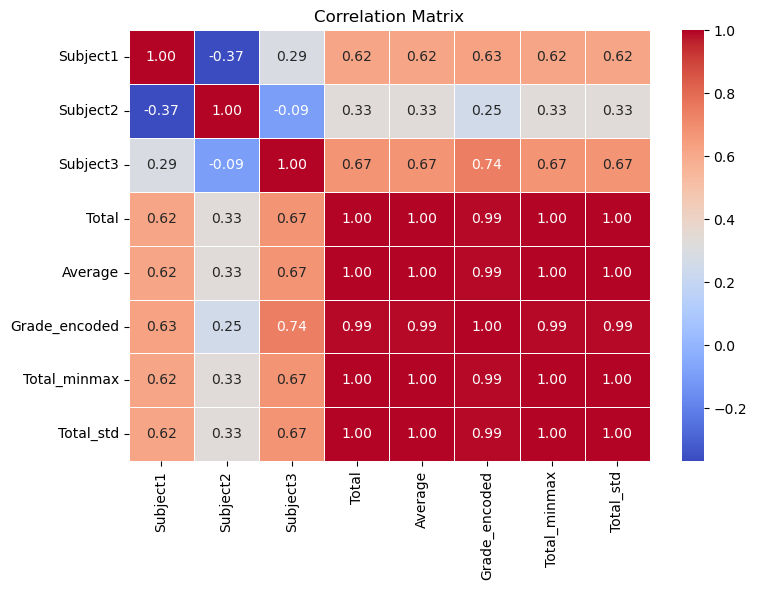

In [13]:
# Compute correlation matrix
corr_matrix = df.select_dtypes(include='number').corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# Normalize a Column 
(e.g., Total Score)

 Min-Max Normalization

In [9]:
scaler = MinMaxScaler()
df['Total_minmax'] = scaler.fit_transform(df[['Total']])

df[['Total', 'Total_minmax']].head()

,Total,Total_minmax
0,241.0,0.000000
1,246.0,0.151515
2,243.0,0.060606
3,274.0,1.000000
4,274.0,1.000000


StandardScaler (Z-score)


In [10]:
scaler_std = StandardScaler()
df['Total_std'] = scaler_std.fit_transform(df[['Total']])

df[['Total', 'Total_std']].head()

,Total,Total_std
0,241.0,-0.966400
1,246.0,-0.635441
2,243.0,-0.834017
3,274.0,1.217929
4,274.0,1.217929


# Final Preview


In [11]:
# Show final processed DataFrame
df.head()

,Name,Subject1,Subject2,Subject3,Total,Average,Grade,Grade_encoded,Total_minmax,Total_std
0,cloe,67.0,78.0,96.0,241.0,80.333333,B,2,0.000000,-0.966400
1,harsh,67.0,99.0,80.0,246.0,82.000000,B,2,0.151515,-0.635441
2,manish,88.0,72.0,83.0,243.0,81.000000,B,2,0.060606,-0.834017
3,zoey,92.0,84.0,98.0,274.0,91.333333,A,3,1.000000,1.217929
4,rishe,83.0,92.0,99.0,274.0,91.333333,A,3,1.000000,1.217929
